# Chapter4 - Exercise
## Conceptual

# 1 ~ 3
Do it Yourself. For 2,3, Use pdf of normal distribution.

# 4
(a) $0.1$

(b) $(0.1)^{2}$

(c) $(0.1)^{100}$

(d) As p increases, The number of observations near any observation decreases exponentially.

(e)
for p, the length of each side of the hypercube is $(0.1)^{p}$. Think of a square whose area is 0.1. Then it's length should be $\sqrt{(0.1)}$. For dimension 3, 4, ..., Use the same logic as above.

# 5
(a) If the Bayes decision boundary is linear, we expect QDA to perform better on the training set because QDA has more flexiblity than LDA. But we expect LDA to perform better on the test set there is a possibility of overfitting with QDA.

(b) If the Bayes decision boundary is non-linear, we expect QDA to perform better on both training set and test set.

(c) We expect the test prediction accuracy of QDA to improve because large sample size can mitigate the problem of overfitting.

(d) **False**. If sample size is small, there is a possibility of overfitting in QDA which will lead to low test error rate.

# 6
$P(Y | X) = \dfrac{1}{1+e^{-(-6+0.05X_{1}+X_{2})}}$

## (a)

In [238]:
# Sigmoid Calculation
from scipy.special import expit

y_pred = expit(-6 + 0.05*40 + 3.5)
print(y_pred)

0.377540668798


## (b)
For $P(Y|X)$ to be 0.5, $-6+0.05X_{1}+X_{2} = 0$ should be satisfied. 

Given $X_{2} = 3.5$, $X_{1}$ should be 50 hours.

## 7
$P(Y=Yes\mid X=4) = \dfrac{P(X=4\mid Y=Yes)\cdot P(Y=Yes)}
{P(X=4\mid Y=Yes)\cdot P(Y=Yes)+P(X=4\mid Y=No)\cdot P(Y=No)}$

$P(Y=Yes)=0.8$
$P(Y=No) = 0.2$

$P(X\mid Y=Yes) \sim N(10\mid6^{2})$

$P(X\mid Y=No) \sim N(0\mid6^{2})$

In [251]:
from scipy.stats import multivariate_normal
p1 = multivariate_normal.pdf(4,mean = 10,cov = 36)
p2 = multivariate_normal.pdf(4,mean = 0, cov = 36)

In [252]:
prob = (p1 * 0.8) / (p1*0.8 + p2*0.2)

In [253]:
prob

0.75185245329752615

# 8
For KNN with K=1, its train error rate is 0% since it predicted based on the response. So, KNN's training rate is 36%, which is higher than logistic regression. So it would be better to use logistic regression for classification of new observations.

# 9
Odds = $\dfrac{p(x)}{1-p(x)}$

## (a)

In [254]:
p = 0.37 / 1.37
p

0.27007299270072993

In [255]:
odds = (0.16) / (1-0.16)
odds

0.1904761904761905

## Applied

In [12]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import preprocessing
from sklearn import neighbors

%matplotlib inline
plt.style.use('seaborn-whitegrid')

# 10
## (a)

In [13]:
weekly = pd.read_csv("../Data/Weekly.csv")

In [14]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [41]:
weekly['Direction'].value_counts()

Up      605
Down    484
Name: Direction, dtype: int64

In [15]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


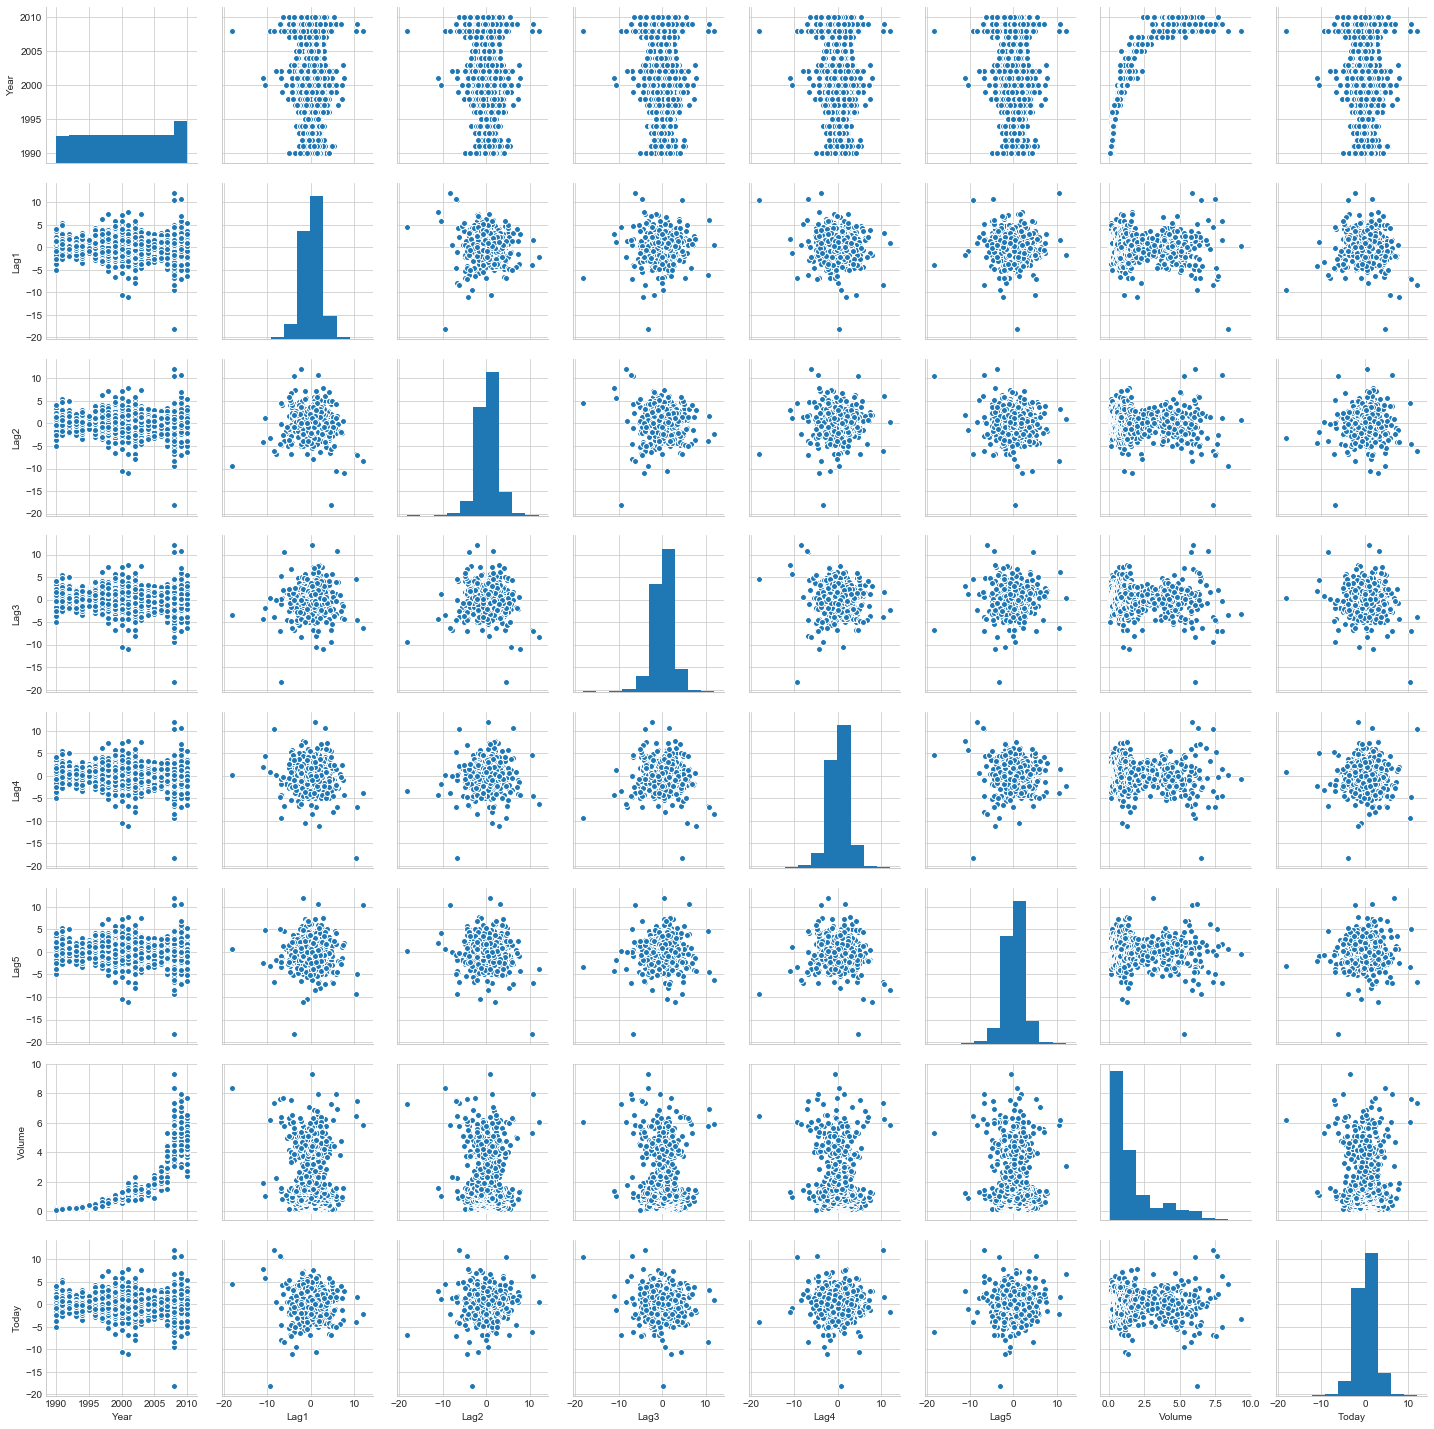

In [16]:
sns.pairplot(weekly)

It seems that there is a relationship between Year and Volume. Volume increases as Year increases. Other relationship is not clear.

## (b)

In [34]:
weekly['Direction2'] = np.where(weekly['Direction'] == 'Up',1,0)

In [35]:
est = smf.ols('Direction2 ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=weekly).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Direction2   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.626
Date:                Mon, 15 Jan 2018   Prob (F-statistic):              0.136
Time:                        17:44:40   Log-Likelihood:                -778.73
No. Observations:                1089   AIC:                             1571.
Df Residuals:                    1082   BIC:                             1606.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5660      0.021     26.852      0.000       0.525       0.607
Lag1          -0.0100      0.006     -1.559      0.119      -0.023       0.003
Lag2           0.0141      0.006      2.177      0.030       0.001       0.027
Lag3          -0.0038      0.006     -0.582      0.560      -0.016       0.009
Lag4          -0.0067      0.006     -1.032      0.302      -0.019       0.006
Lag5          -0.0034      0.006     -0.529      0.597      -0.016       0.009
Volume        -0.0057      0.009     -0.635      0.525      -0.023       0.012
==============================================================================
Omnibus:                        8.706   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.013   Jarque-Bera (JB):              175.454
Skew:                          -0.220   Prob(JB):                     7.95e-39
Kurtosis:                       1.083   Cond. No.                         3.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`Lag2` appears to be statistically significant since its p-value is 0.03, which is lower than 0.05.

## (c)

In [37]:
prob = est.predict(weekly[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']])
prob.head()

0    0.607192
1    0.600412
2    0.587001
3    0.483715
4    0.616132
dtype: float64

In [38]:
pred_direction = np.where(prob>0.5,"Up","Down")

In [39]:
pd.crosstab(pred_direction, weekly['Direction'])

Direction,Down,Up
row_0,,
Down,52,44
Up,432,561


## (d) Logistic Regression

In [51]:
weekly_train = weekly[weekly['Year'] < 2009]
weekly_test = weekly[weekly['Year'] >= 2009]

In [52]:
est = smf.ols('Direction2 ~ Lag2', data=weekly_train).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Direction2   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.159
Date:                Mon, 15 Jan 2018   Prob (F-statistic):             0.0417
Time:                        18:58:19   Log-Likelihood:                -707.41
No. Observations:                 985   AIC:                             1419.
Df Residuals:                     983   BIC:                             1429.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5505      0.016     34.726      0.000       0.519       0.582
Lag2           0.0142      0.007      2.039      0.042       0.001       0.028
==============================================================================
Omnibus:                        7.070   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.029   Jarque-Bera (JB):              161.569
Skew:                          -0.208   Prob(JB):                     8.24e-36
Kurtosis:                       1.060   Cond. No.                         2.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
prob = est.predict(weekly_test[['Lag2']])
prob.head()
pred_direction = np.where(prob > 0.5, "Up", "Down")

In [77]:
pd.crosstab(pred_direction, weekly_test['Direction'])

Direction,Down,Up
row_0,,
Down,9,5
Up,34,56


## (e) LDA

In [97]:
X_test = weekly_test['Lag2'].values.reshape(-1,1)
X_train = weekly_train['Lag2'].values.reshape(-1,1)
y_test = weekly_test['Direction2']
y_train = weekly_train['Direction2']

In [98]:
lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X_train, y_train).predict(X_test)
y_pred = np.where(y_pred == 1, "Up", "Down")
pd.crosstab(y_pred, weekly_test['Direction'])

Direction,Down,Up
row_0,,
Down,9,5
Up,34,56


## (f) QDA

In [100]:
qda = QuadraticDiscriminantAnalysis()
y_pred = qda.fit(X_train, y_train).predict(X_test)
y_pred = np.where(y_pred == 1, "Up", "Down")
pd.crosstab(y_pred, weekly_test['Direction'])

Direction,Down,Up
row_0,,
Up,43,61


## (g) KNN

In [105]:
# n = 1
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
y_pred = knn.fit(X_train, y_train).predict(X_test)

pd.crosstab(y_pred, weekly_test['Direction'])

Direction,Down,Up
row_0,,
0,21,31
1,22,30


## (h)
It seems that Logistic Regression and LDA provide the best results on this data.

## (i)
Do it yourself.

# 11
## (a)

In [116]:
auto = pd.read_csv('../Data/Auto.csv')

In [117]:
auto['mpg2'] = np.where(auto['mpg'] > auto['mpg'].median(),1,0)

## (b)

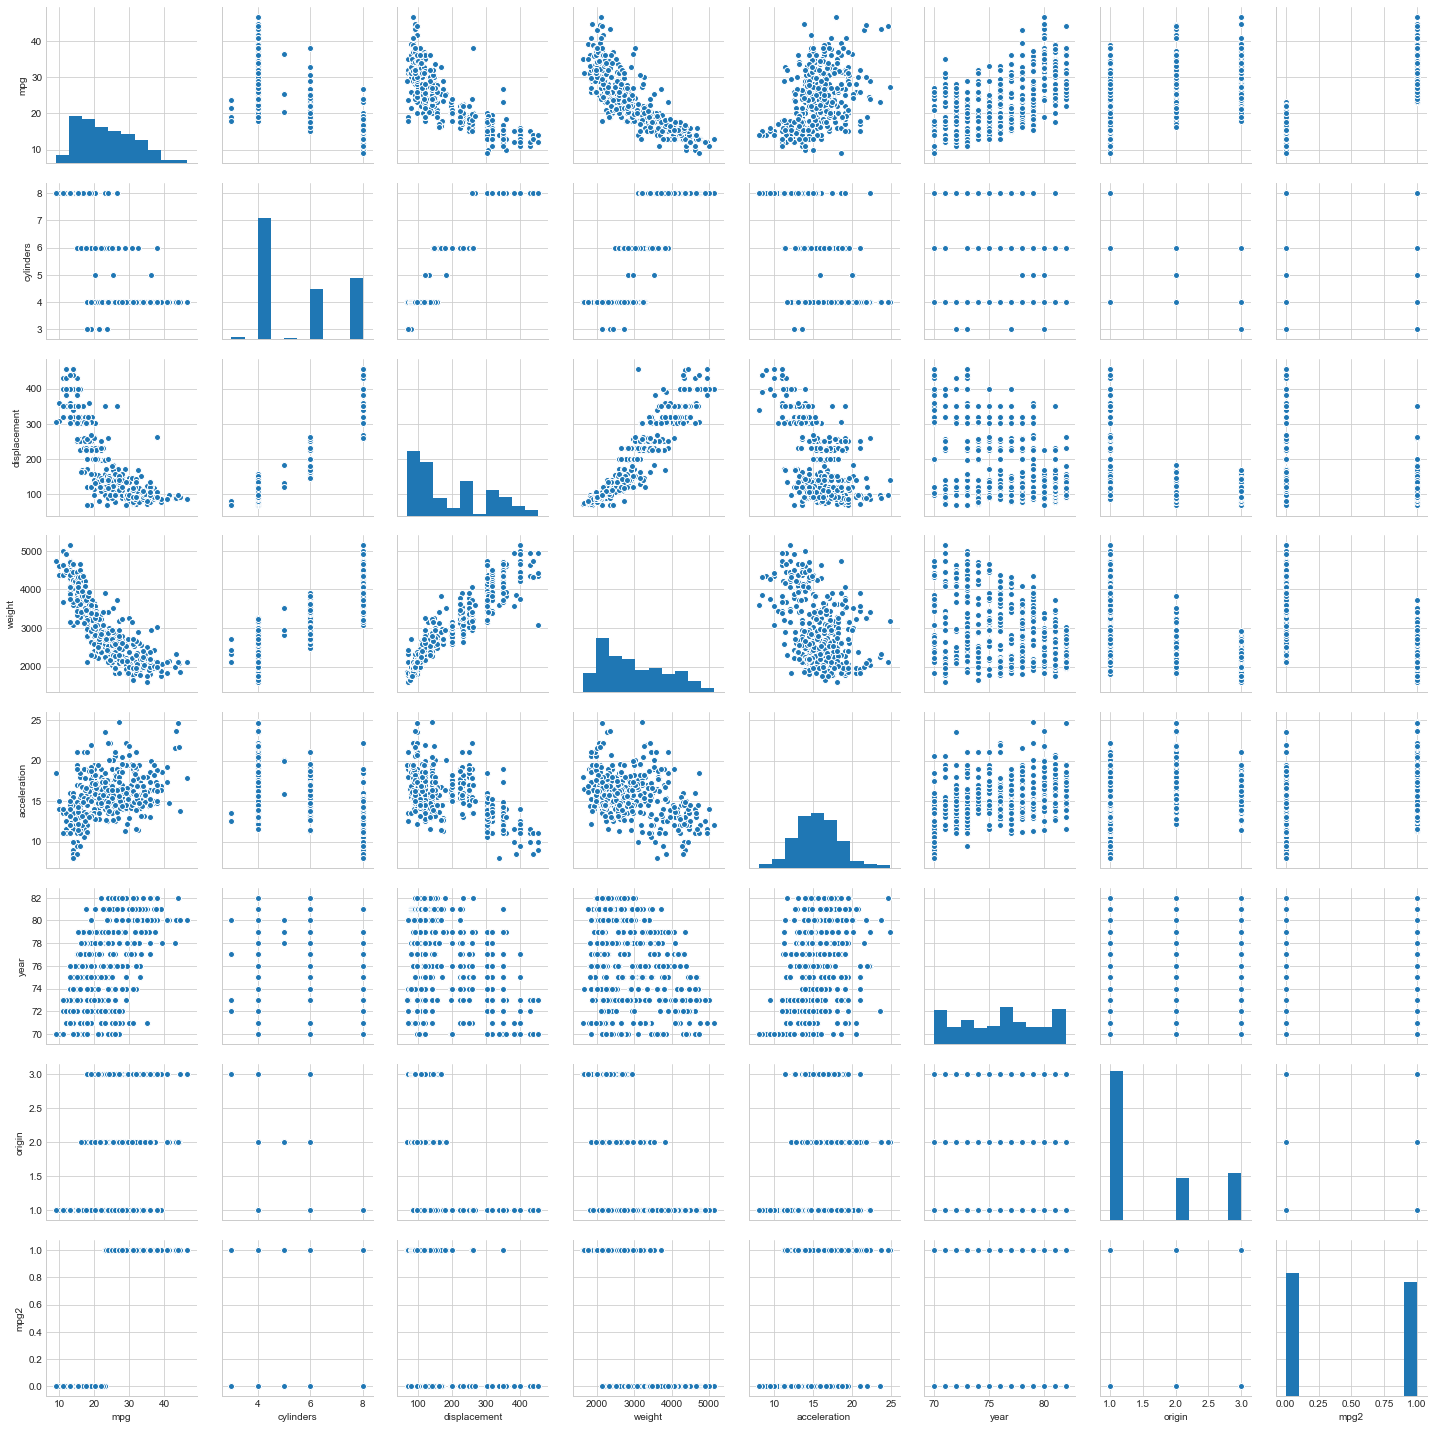

In [119]:
sns.pairplot(auto)

`Weight` and `Acceleration` seem mostly likely to be useful in predicting mpg01. `displacement` is also possible.

## (c)
To split the data into a training set and a test set,
use `train_test_split` method from scikit-learn. I will use `Weight` and `Acceleration` as predictors.

In [161]:
from sklearn.model_selection import train_test_split
auto_train, auto_test = train_test_split(auto, test_size=0.3)

In [162]:
X_train = auto_train[['weight','acceleration']].as_matrix()
y_train = auto_train['mpg2']
X_test = auto_test[['weight', 'acceleration']].as_matrix()
y_test = auto_test['mpg2']

## (d) LDA

In [163]:
lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X_train,y_train).predict(X_test)
print('Test Error:', 1 - (y_pred == y_test).mean())
pd.crosstab(y_pred,y_test)

Test Error: 0.125


mpg2,0,1
row_0,,
0,50,5
1,10,55


## (e) QDA

In [164]:
qda = QuadraticDiscriminantAnalysis()
y_pred = qda.fit(X_train,y_train).predict(X_test)
print('Test Error:', 1 - (y_pred == y_test).mean())
pd.crosstab(y_pred,y_test)

Test Error: 0.116666666667


mpg2,0,1
row_0,,
0,52,6
1,8,54


## (f) Logistic Regression

In [165]:
clf = skl_lm.LogisticRegression(solver='newton-cg')
y_pred = clf.fit(X_train, y_train).predict(X_test)
print('Test Error:', 1 - (y_pred == y_test).mean())
pd.crosstab(y_pred,y_test)

Test Error: 0.116666666667


mpg2,0,1
row_0,,
0,54,8
1,6,52


## (g) KNN
Loop for n_neighbors = k

In [186]:
for k in range(30):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k+1)
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    print('Test Error for K = {}:'.format(k),
          round(1 - (y_pred == y_test).mean(),3))

Test Error for K = 0: 0.217
Test Error for K = 1: 0.175
Test Error for K = 2: 0.142
Test Error for K = 3: 0.142
Test Error for K = 4: 0.15
Test Error for K = 5: 0.133
Test Error for K = 6: 0.133
Test Error for K = 7: 0.117
Test Error for K = 8: 0.117
Test Error for K = 9: 0.125
Test Error for K = 10: 0.117
Test Error for K = 11: 0.117
Test Error for K = 12: 0.117
Test Error for K = 13: 0.117
Test Error for K = 14: 0.117
Test Error for K = 15: 0.117
Test Error for K = 16: 0.117
Test Error for K = 17: 0.117
Test Error for K = 18: 0.117
Test Error for K = 19: 0.117
Test Error for K = 20: 0.125
Test Error for K = 21: 0.117
Test Error for K = 22: 0.125
Test Error for K = 23: 0.117
Test Error for K = 24: 0.125
Test Error for K = 25: 0.125
Test Error for K = 26: 0.125
Test Error for K = 27: 0.125
Test Error for K = 28: 0.133
Test Error for K = 29: 0.125


# 12
## (a)

In [187]:
def Power():
    print(2 ** 3)

In [188]:
Power()

8


## (b)

In [194]:
def Power2(x, a):
    print(x ** a)

In [195]:
Power2(3,8)

6561


## (c)

In [196]:
Power2(10,3)
Power2(8,17)
Power2(131,3)

1000
2251799813685248
2248091


## (d)

In [198]:
def Power3(x, a):
    result = x ** a
    return result

## (e)

In [207]:
X = np.arange(1,11)
y = np.zeros(10)
for i in range(10):
    y[i] = Power3(X[i],2)

Text(0,0.5,'log y')

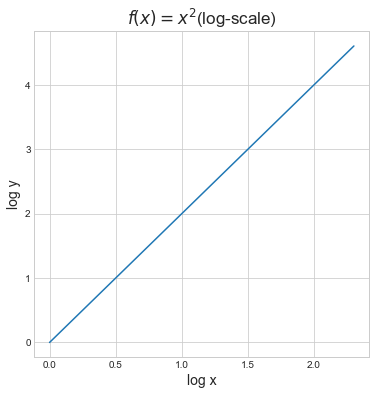

In [220]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plt.plot(np.log(X),np.log(y))
ax.set_title("$f(x) = x^{2}$(log-scale)", fontsize=17)
ax.set_xlabel("log x", fontsize=14)
ax.set_ylabel("log y", fontsize=14)

## (f)

In [231]:
def PlotPower(x_min,x_max,a):
    X = np.arange(x_min,x_max+1)
    fig, ax = plt.subplots(1,1, figsize=(6,6))
    plt.plot(X,np.power(X,3))
    ax.set_title("$f(x) = x^{%s}$" % a, fontsize=17)
    ax.set_xlabel("x", fontsize=14)
    ax.set_ylabel("y", fontsize=14)

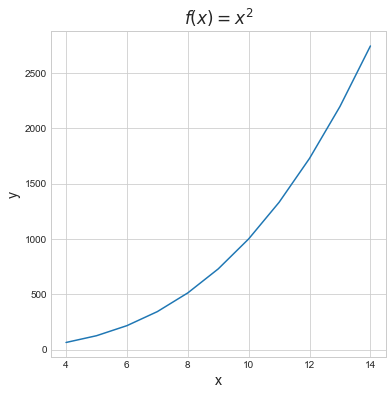

In [233]:
PlotPower(4,14,2)

# 13
Do it Yourself with 
- `LogisticRegression`
- `LinearDiscriminantAnalysis`
- `QuadraticDiscriminantAnalysis`
- `KNeighborsClassifier`